<a href="https://colab.research.google.com/github/Thangivasu/fmml_lab1/blob/main/THANGI_VASU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('/content/day.csv')

In [82]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [83]:
data.shape

(731, 16)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [85]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [86]:
print(data.temp)

0      0.344167
1      0.363478
2      0.196364
3      0.200000
4      0.226957
         ...   
726    0.254167
727    0.253333
728    0.253333
729    0.255833
730    0.215833
Name: temp, Length: 731, dtype: float64


In [87]:
print(data.atemp)

0      0.363625
1      0.353739
2      0.189405
3      0.212122
4      0.229270
         ...   
726    0.226642
727    0.255046
728    0.242400
729    0.231700
730    0.223487
Name: atemp, Length: 731, dtype: float64


In [88]:
x = data['temp'].values
y = data['atemp'].values

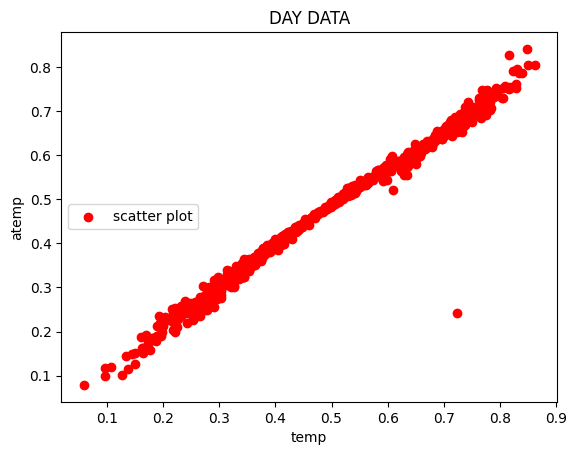

In [89]:
plt.scatter(x,y, color='Red',label='scatter plot')
plt.title('DAY DATA')
plt.xlabel('temp')
plt.ylabel('atemp')
plt.legend(loc=6)
plt.show()

LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/AirQualityUCI (2).xlsx')

In [ ]:
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [ ]:
df.head()

In [ ]:
%matplotlib inline

In [ ]:
print(df.shape)

(9357, 15)


In [ ]:
print(df.info)

<bound method DataFrame.info of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    

In [ ]:
print(df.describe)

In [ ]:
X=df['RH'].values
Y=df['AH'].values

In [ ]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [ ]:
0
m=len(X)
numer=0
denom=0
for i in range(m):
   numer+=(X[i]-mean_x)*(Y[i]-mean_y)
   denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1,b0)

In [ ]:
max_x=np.max(X)+ 100
min_x=np.min(X)-100
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color="#58b870",label="regression line")
plt.scatter(X,Y,c="#ef5423",label="Scatter Points")
plt.xlabel("RH")
plt.ylabel("AH")
plt.legend()
plt.show()

In [ ]:
ss_t=0 
ss_r=0

for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)

print(r2_score)